**Desafio 1**: Baixe a base de dados com as amostras das idades dos moradores do município de Cidade Alegre e crie os histogramas de colunas e de linha lado a lado, buscando interpretar as diferenças entre eles e o que podem representar separadamente. Adicione também uma linha que define a mediana da distribuição no histograma de linha e escreva o valor dessa medida no gráfico.

In [3]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

dados = pd.read_csv("pop_idade.csv")
dados.head()

,idade
0,39
1,33
2,41
3,50
4,32


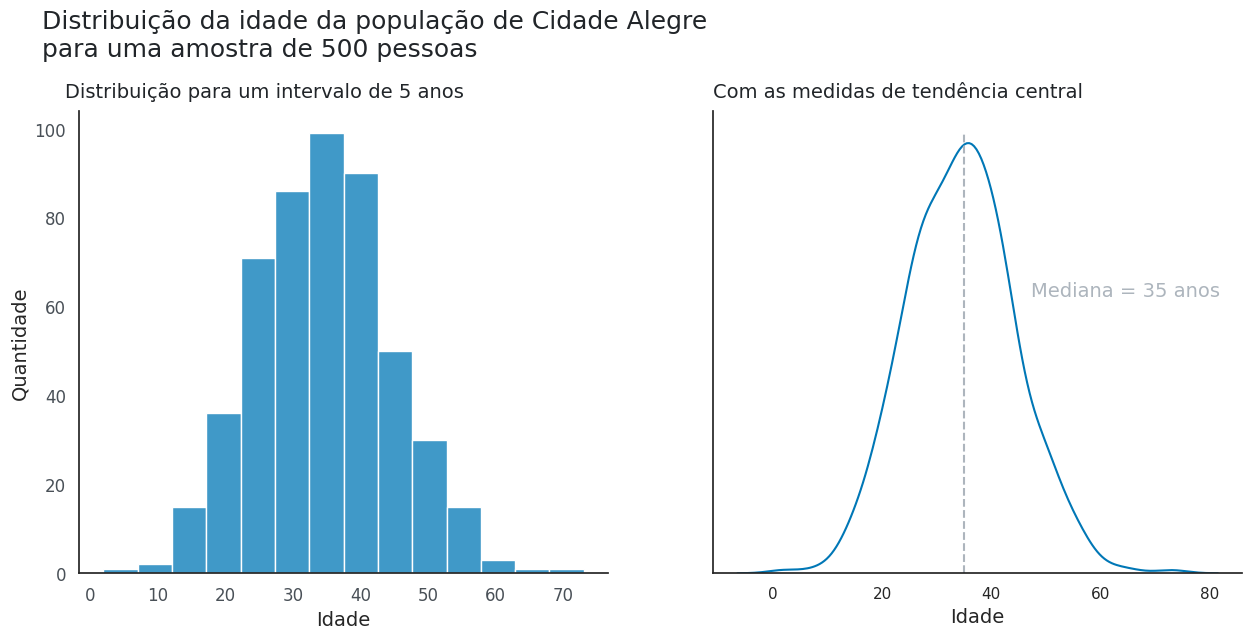

In [5]:
# Área do gráfico e tema da visualização
fig, axs = plt.subplots(1, 2, figsize=(15,6))
sns.set_theme(style="white")

# Título dos gráficos
fig.suptitle("Distribuição da idade da população de Cidade Alegre \npara uma amostra de 500 pessoas",
             fontsize=18, color=CINZA1, x = 0.1, y = 1.05, ha="left")

# GRÁFICO 1 - Histograma de Colunas

sns.histplot(ax = axs[0], data = dados, x = "idade", binwidth = 5, color = AZUL2)
axs[0].set_title('Distribuição para um intervalo de 5 anos', size=14, color=CINZA1, x = 0.35,  pad = 10)
axs[0].set_xlabel('Idade', fontsize = 14)
axs[0].set_ylabel('Quantidade', fontsize = 14)
axs[0].yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
axs[0].xaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine()

# GRÁFICO 2 - Histograma de Linhas

sns.kdeplot(ax = axs[1], data = dados, x = "idade", color = AZUL2)
axs[1].set_title('Com as medidas de tendência central', size=14, color=CINZA1, x = 0.35,  pad = 10)
axs[1].set_xlabel('Idade', fontsize = 14)
axs[1].set_ylabel('')
axs[1].yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
axs[1].set_yticklabels([])
sns.despine()

# gerando a linha que define a mediana e anotando seu valor
axs[1].vlines(x = dados.idade.median(), ymin = 0, ymax = 0.04, colors = CINZA3, linestyles = "--")
axs[1].text(0.6, 0.6, f'Mediana = {int(dados.idade.median())} anos', fontsize=14, color = CINZA3, transform=axs[1].transAxes)

plt.show()

**Desafio 2**: Represente no boxplot dos volumes do amaciante os limites superiores e inferiores do diagrama de caixa. Comente sobre o resultado encontrado ao desenhar esses limites no boxplot.

In [6]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import seaborn as sns

# Importando a base de dados dos volumes de um amaciante em 1000 amostras realizadas
vol_amaciante = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/dataviz-graficos/master/dados/volume_amaciante.csv")

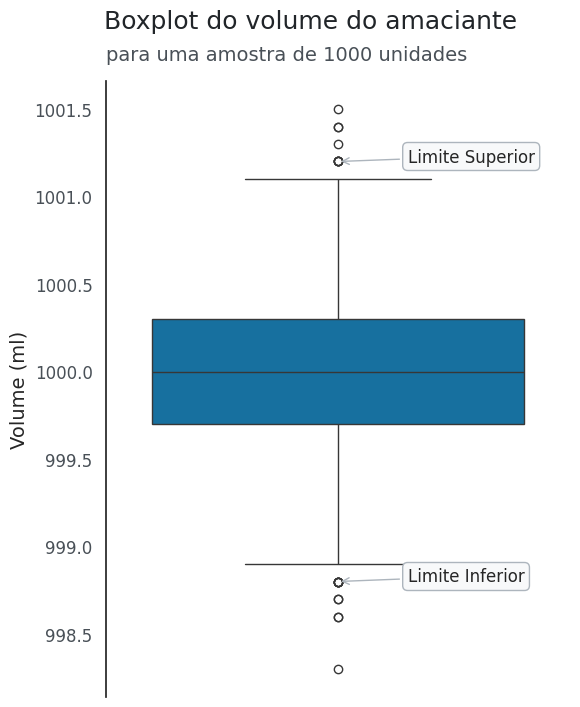

In [7]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(6,8))
sns.set_theme(style="white")

# Gerando o boxplot
ax = sns.boxplot(data = vol_amaciante, y = "Volume", orient = "v", color = AZUL2)

## Personalizando o gráfico
plt.suptitle('Boxplot do volume do amaciante', size=18, color=CINZA1, ha = 'right', x = 0.81, y = 0.97)
plt.title('para uma amostra de 1000 unidades', fontsize=14, color=CINZA2, pad = 15, loc = "left")
ax.set_xlabel('')
ax.set_ylabel('Volume (ml)', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine(bottom=True)

# Calculando o intervalo interquartil(IIQ) e os limites máximos e mínimos
IIQ = vol_amaciante["Volume"].quantile(0.75) - vol_amaciante["Volume"].quantile(0.25)
limite_superior = vol_amaciante["Volume"].quantile(0.75) + 1.5 * IIQ
limite_inferior = vol_amaciante["Volume"].quantile(0.25) - 1.5 * IIQ

# Adicionando a anotação dos limites superiores e inferiores de um boxplot
ax.annotate("Limite Superior", xy=(0, limite_superior), xycoords='data',  # coordenadas do ponto desejado
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),                          # caixa de texto
            xytext=(50, 0), textcoords='offset points',                                 # posição do texto
            arrowprops=dict(arrowstyle="->", color=CINZA3))                             # propriedades da seta

ax.annotate("Limite Inferior", xy=(0, limite_inferior), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3))

plt.show()